## Building a deep neural networks to detect birds vocalisation.



In [ ]:

!pip install -upgrade librosa
!pip install resampy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.3 MB/s eta 0:00:00


## Step 0: Download data and code


In [ ]:
colab = True

In [ ]:
# This snippet of code can take up to 5 minutes or so.
# Plase allow this to complete. [ 0 marks]
if colab:
    !pip install SoundFile
    from google.colab import drive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    import zipfile

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
     # Download code files
    downloaded= drive.CreateFile({'id':"1js1fz4Bu98NIds4cErL7NdT1efxavixp"})
    downloaded.GetContentFile('Code.zip')

    # Extract files to temporary location in Google Drive
    with zipfile.ZipFile('Code.zip', 'r') as zip_file:
       zip_file.extractall()

    # Download data files
   # downloaded = drive.CreateFile({'id':"16_ABjuGGDzlu6F67hoy0FLKtHjsWASPa"})
    #downloaded.GetContentFile('Data.zip')

    # Extract files to temporary location in Google Drive
    #with zipfile.ZipFile('Data.zip', 'r') as zip_file:
       # zip_file.extractall()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology

/content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology


In [3]:
# Do not delete these imports [ 0 marks]
from Preprocessing import *
import librosa
import numpy as np
import random

## Step 1: Pre-process the data

In [3]:
# Name for the presence and absence class based on how the data was annotated

# -----------------------------
positive_class = ['1'] # bird call
negative_class = ['0'] # no bird call



# -----------------------------
lowpass_cutoff = 2000 # Cutt off for low pass filter
downsample_rate =22000 # Frequency to downsample to
nyquist_rate = 11000 # Nyquist rate (half of sampling rate)
segment_duration = 3 # how long should a segment be


# Spectrogram hyper-parameters [ 0 marks]
# -----------------------------
n_fft = 1024 # Hann window length
hop_length = 256 # Sepctrogram hop size
n_mels = 128 # Spectrogram number of me  ls
f_min = 2500 # Spectrogram, minimum frequency for call
f_max = 7000 # Spectrogram, maximum frequency for call


# -----------------------------
species_folder = 'Data' #  contain /Audio and /Annotations
file_type = 'svl' #
audio_extension = '.wav' #

In [ ]:
# pre_processing step 1
pre_pro = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)

X, Y = pre_pro.create_dataset(False)


Processing: 19_19_fermat_15
Found file
Filtering...
Downsampling...
19_19_fermat_15
Reading annotations...
Processing: 23_2-2-2024=20_53_19
Found file
Filtering...
Downsampling...
23_2-2-2024=20_53_19
Reading annotations...
Processing: 6_2-2-2024=14_46_17
Found file
Filtering...
Downsampling...
6_2-2-2024=14_46_17
Reading annotations...
Processing: 9_2-2-2024=21_1_26
Found file
Filtering...
Downsampling...
9_2-2-2024=21_1_26
Reading annotations...
Processing: 6_2-2-2024=14_43_57
Found file
Filtering...
Downsampling...
6_2-2-2024=14_43_57
Reading annotations...
Processing: 23_2-2-2024=20_39_55
Found file
Filtering...
Downsampling...
23_2-2-2024=20_39_55
Reading annotations...
Processing: 15_audio_34
Found file
Filtering...
Downsampling...
15_audio_34
Reading annotations...
Processing: 15_audio_79
Found file
Filtering...
Downsampling...
15_audio_79
Reading annotations...
Processing: 8_emmanuel_5
Found file
Filtering...
Downsampling...
8_emmanuel_5
Reading annotations...
Processing: 23_2-

## Data shapes

In [ ]:

#X=np.load('X_data_last.npy')
#Y=np.load('Y_data_last.npy')

In [ ]:
# X and Y shape
print(X.shape)
print(Y.shape)

(6497, 66000)
(6497,)


### step 1: preprocessing

 `X` has segments of audio which have been extracted from the audio files along with their label in `Y`.

*   Function  ``audio_to_spectrogram(audio)``  takes in one audio signal, and returns a mel-spectrogram.

*    implement the Min_Max normalization to scale the data within [0,1] some type of normalisation.



In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
def audio_to_spectrogram(audio):
  # mel_spectrogram
  S=librosa.feature.melspectrogram(y=audio,n_mels=n_mels,hop_length=hop_length,n_fft=n_fft,sr=22000)
  S_dB=librosa.power_to_db(S,ref=np.max)
  S_dB_scale=scaler.fit_transform(S_dB)
  return S_dB_scale


### visualize 2 bird presence events



Presence events

1


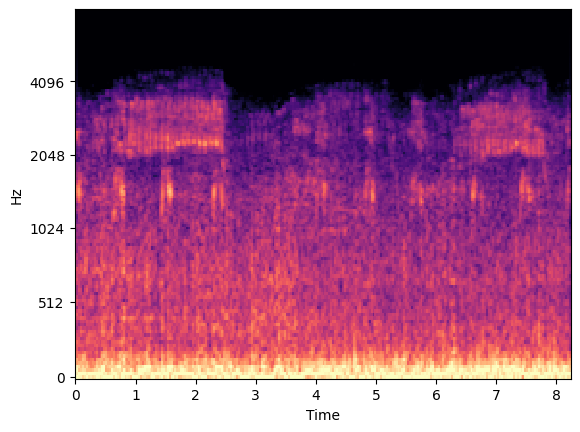

In [ ]:
 #random presence spectrogram
i=random.randint(0,len(X[Y=='1']))
#random selection using mask indexing.
X_s = audio_to_spectrogram(X[Y=='1'][i])
librosa.display.specshow(X_s,sr=22000, x_axis='time',y_axis='mel')
# corresponding target
print(Y[Y=='1'][i])

1


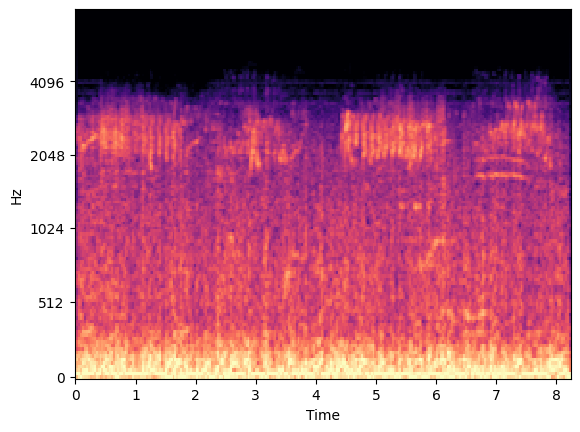

In [ ]:
# random presence spectrogram
i=random.randint(0,len(X[Y=='1']))
#random select using mask indexing
X_s = audio_to_spectrogram(X[Y=='1'][i])
librosa.display.specshow(X_s,sr=22000, x_axis='time',y_axis='mel')

# corresponding target
print(Y[Y=='1'][i])

## visualize 2 bird Absence events.

0


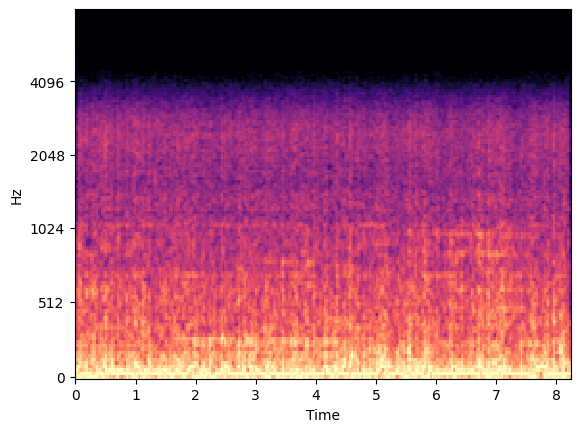

In [ ]:
# random absence spectrogram
i=random.randint(0,len(X[Y=='0']))
#
X_s = audio_to_spectrogram(X[Y=='0'][i])
librosa.display.specshow(X_s,sr=22000, x_axis='time',y_axis='mel')

# corresponding target
print(Y[Y=='0'][i])

0


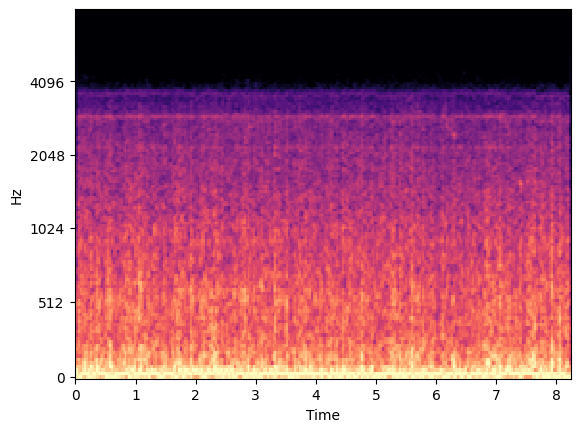

In [ ]:
# random absence spectrogram
i=random.randint(0,len(X[Y=='0']))
#
X_s = audio_to_spectrogram(X[Y=='0'][i])
librosa.display.specshow(X_s,sr=22000, x_axis='time',y_axis='mel')

# corresponding target
print(Y[Y=='0'][i])

Here is a function that will convert all of your audio segments into spectrograms, using the function "audio_to_spectogram wrote above.

In [7]:
def convert_all_to_image(segments):

  spectrograms = []
  for segment in segments:
      spectrograms.append(audio_to_spectrogram(segment))

  return np.array(spectrograms)

Create all the spectrograms

In [ ]:
X_S = convert_all_to_image(X)

In [ ]:
X_S=np.load('spec_data_last_N.npy')

In [ ]:
X_S.shape

(6497, 128, 258)

Look how many precense and absence examples are in the training data:
we have unbalanced data


In [ ]:
unique, counts = np.unique(Y, return_counts=True)
original_distribution = dict(zip(unique, counts))
print('Data distribution:',original_distribution)

Data distribution: {'0': 1379, '1': 5118}


###  given the values above, i perform one simple augmentation technique to increase the number of bird abscence exemples; this is to balanced the dataset.

### augmentation:

* function that will augment one spectrogram.
* The input will be a spectrogram, and it's target.
* The output should be the modified spectogram, and the target.

This function receives one spectrogram (2D matrix).

It also receives the true target value for that spectrogram


In [8]:
def augment_one_spectrogram(spectrogram, true_target):

  # TO DO
  shift = random.randint(0,len(spectrogram))            # spectrogram shifting technique
  new_spectrogram=np.roll(spectrogram,shift=shift)
  true_target=true_target
  # do not modify the return
  # The new spectrogram can be stored in "new_spectrogram"
  return new_spectrogram, true_target

This function will randomly select one spectrogram which contains a gibbon call.

In [ ]:
def randomly_select_presence(all_spectrograms, targets):

  # Find all the indices where there is a gibbon example
  presence_indices = np.where(targets =='1')[0]

  # Randomly select index
  random_index = random.randint(0,len(presence_indices)-1)

  return all_spectrograms[presence_indices[random_index]]

This function will randomly select one spectrogram which does not contain a gibbon call.

In [ ]:
def randomly_select_absence(all_spectrograms, targets):

  # Find all the indices where there is a no-gibbon example
  absence_indices = np.where(targets =='0')[0]

  # Randomly select index
  random_index = random.randint(0,len(absence_indices)-1)

  return all_spectrograms[absence_indices[random_index]]

This function will generate one new spectrogram with a gibbon call in it.

In [ ]:
def generate_new_presence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    presence_spectrogram = randomly_select_presence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(presence_spectrogram,
                                                                      '1')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)

This function will generate one new spectrogram without a gibbon call in it.

In [ ]:
def generate_new_absence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    absence_spectrogram = randomly_select_absence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(absence_spectrogram,
                                                                      '0')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)



* generate extra bird call.

In [ ]:
new_presence, new_targets = generate_new_presence_spectrograms(X_S, Y,2)

Check the shapes of the newly created data

In [ ]:
print(new_presence.shape)
print(new_targets.shape)

(2, 128, 258)
(2,)




Randomly select one of newly created spectrograms, and view it.

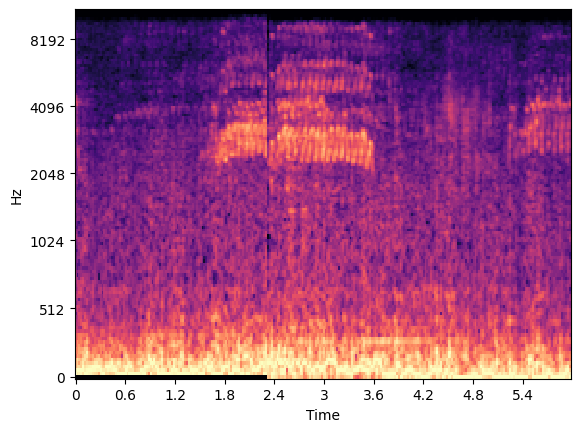

In [ ]:
i=random.randint(0,len(new_presence))
librosa.display.specshow( new_presence[i],sr=22000, x_axis='time',y_axis='mel')

Now combine all existing spectrograms which contain bird calls, along with all of the newly created ones.

In [ ]:
X_positive = np.concatenate([X_S[np.where(Y =='1')], new_presence])
X_positive = np.asarray(X_positive)
print(X_positive.shape)

Y_positive = np.concatenate([Y[np.where(Y =='1')], new_targets])
Y_positive = np.asarray(Y_positive)
print(Y_positive.shape)

(5120, 128, 258)
(5120,)




* generate extra bird absence spectrograms

In [ ]:
new_absence, new_targets = generate_new_absence_spectrograms(X_S, Y, 3735)

Check the shapes of the newly created data

In [ ]:
print(new_absence.shape)
print(new_targets.shape)

(3735, 128, 258)
(3735,)




Randomly select one newly created spectrograms, and view it.

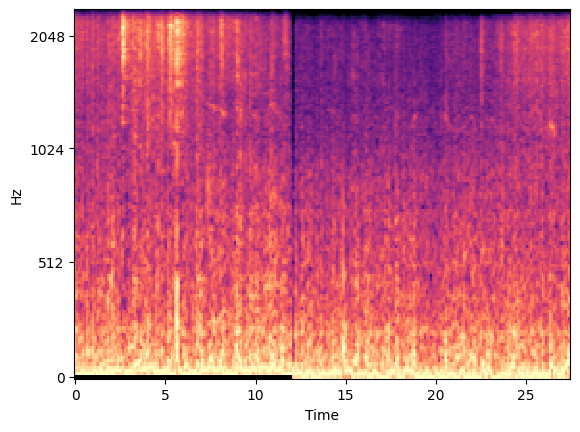

In [ ]:
i=random.randint(0,len(new_absence))
librosa.display.specshow(new_absence[i],sr=22000, x_axis='time',y_axis='mel')

Now combine all of your existing spectrograms which do not contain bird calls, along with all of the newly created ones.

In [ ]:
X_negatives = np.concatenate([X_S[np.where(Y =='0')], new_absence])
X_negatives = np.asarray(X_negatives)
print(X_negatives.shape)

Y_negatives = np.concatenate([Y[np.where(Y =='0')], new_targets])
Y_negatives = np.asarray(Y_negatives)
print(Y_negatives.shape)

(5114, 128, 258)
(5114,)


Combine all the positives features and negative features. Do the same for the targets

In [ ]:
X_dataset = np.concatenate([X_positive, X_negatives])
Y_dataset = np.concatenate([Y_positive, Y_negatives])

Check the shapes of the completed dataset.

In [9]:
X_dataset=np.load('X_train_data_last_N.npy')
Y_dataset=np.load('Y_train_data_last_N.npy')

In [ ]:
print(X_dataset.shape)
print(Y_dataset.shape)

(10234, 128, 258)
(10234,)


Reshape so that the data is in a format that is ready for Tensorflow.

In [10]:
# split the data ( for computational ressource purpose: RAM )
index=np.random.randint(0,10234,5000)
X_t=X_dataset[index]
Y_t=Y_dataset[index]

In [ ]:
unique, counts = np.unique(Y_t, return_counts=True)
original_distribution = dict(zip(unique, counts))
print('Data distribution:',original_distribution)

Data distribution: {'0': 2503, '1': 2497}


In [ ]:
X_t.shape

(5000, 128, 258)

In [11]:
X_t = np.expand_dims(X_t, axis=-1)

Check the shape again

In [ ]:
print(X_t.shape)
print(Y_t.shape)

(5000, 128, 258, 1)
(5000,)


Some pre-processing to convert the categorical targets into one-hot encoded ones

In [ ]:
from tensorflow.keras.utils import to_categorical
call_order = ['0','1']

# Converting categorical string labels ('birds' and 'no-birds') to 0s and 1s
for index, call_type in enumerate(call_order):
    Y_t = np.where(Y_t == call_type, index, Y_t)

Y_t = to_categorical(Y_t,num_classes = 2)

In [ ]:
#Y_t=np.load('Y_cat.npy')

Check shapes again

In [ ]:
print(X_t.shape)
print(Y_t.shape)

(5000, 128, 258, 1)
(5000, 2)


In [ ]:
del X_S

# models training

* Build and train 2D CNN

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split

INPUT_SHAPE = (X_t.shape[1],X_t.shape[2], 1)

In [ ]:
del model

In [ ]:

model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 4, input_shape = INPUT_SHAPE, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size =(3,3)))

# 2nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 4, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))



# 3rd conv layer
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))



# flatten the ouput and feed it into dense layer
model.add(Flatten())

# create 20 fully connected units
model.add(Dense(units = 20, activation='relu'))

# The output layers
model.add(Dense(2, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
# TO DO ...

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 125, 255, 16)      272       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 41, 85, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 38, 82, 32)        8224      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 12, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 24, 64)         32832     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 3, 8, 64)         

### visualize the model architecture

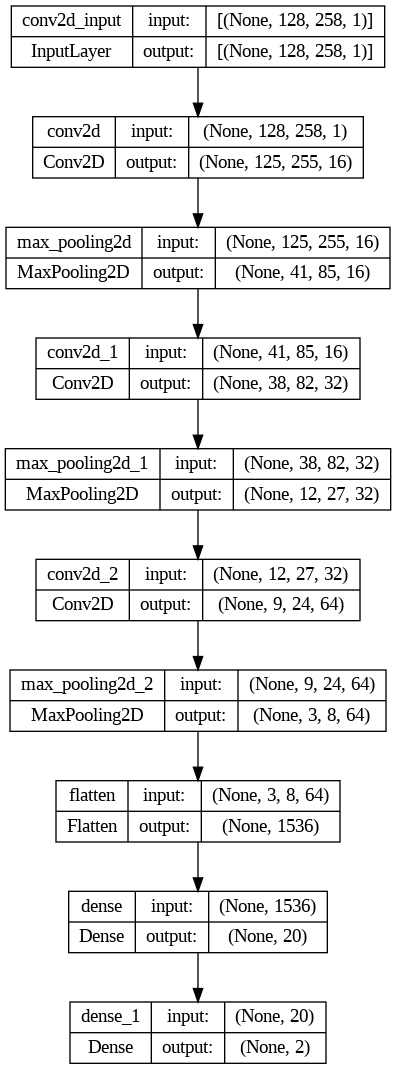

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model1_arch.png',show_shapes=True)

Train the model

In [ ]:
# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_t,Y_t,test_size = 0.2, shuffle=True)

In [ ]:
# TO DO
history=model.fit(X_train,y_train,batch_size=32,epochs=6,validation_split=0.2)

Epoch 1/6
100/100 [==============================] - 91s 891ms/step - loss: 0.5616 - accuracy: 0.6784 - val_loss: 0.2800 - val_accuracy: 0.8825
Epoch 2/6
100/100 [==============================] - 78s 779ms/step - loss: 0.2513 - accuracy: 0.8831 - val_loss: 0.2376 - val_accuracy: 0.8938
Epoch 3/6
100/100 [==============================] - 76s 759ms/step - loss: 0.2077 - accuracy: 0.9103 - val_loss: 0.1827 - val_accuracy: 0.9212
Epoch 4/6
100/100 [==============================] - 78s 774ms/step - loss: 0.1830 - accuracy: 0.9350 - val_loss: 0.1671 - val_accuracy: 0.9262
Epoch 5/6
100/100 [==============================] - 72s 723ms/step - loss: 0.1778 - accuracy: 0.9316 - val_loss: 0.1676 - val_accuracy: 0.9262
Epoch 6/6
100/100 [==============================] - 77s 771ms/step - loss: 0.1608 - accuracy: 0.9403 - val_loss: 0.1630 - val_accuracy: 0.9400


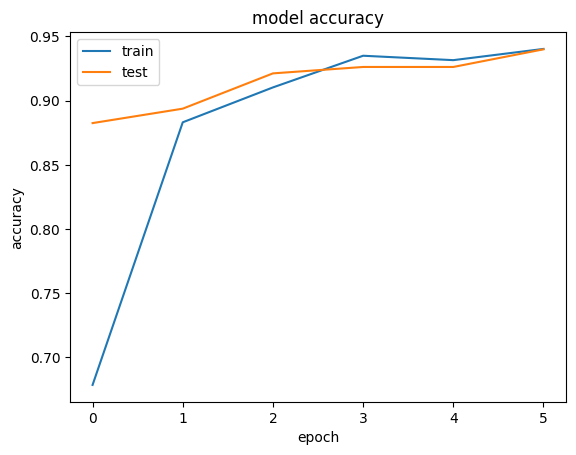

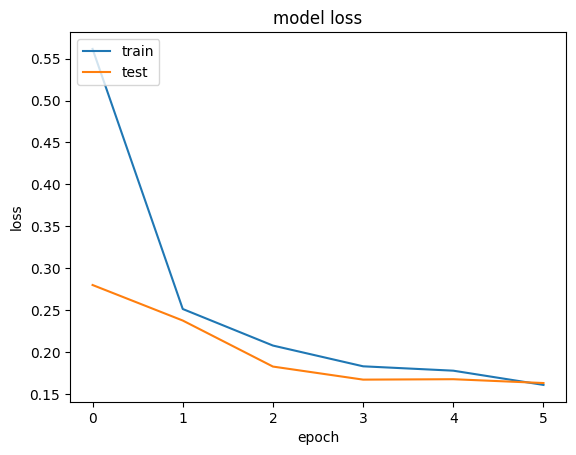

In [ ]:
#visualize  the history of the data
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### evaluation of the 2D_CNN model on the testing file ( test set)

In [ ]:
## get the testing files
pre_pro_test = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)

X_test, Y_test = pre_pro_test.create_dataset(False)


Processing: 21_3-2-2024=7_19_54
Found file
Filtering...
Downsampling...
21_3-2-2024=7_19_54
Reading annotations...
Processing: 23_2-2-2024=20_39_19
Found file
Filtering...
Downsampling...
23_2-2-2024=20_39_19
Reading annotations...
Processing: 19_19_fermat_12
Found file
Filtering...
Downsampling...
19_19_fermat_12
Reading annotations...
Processing: 17_20240203_081105
Processing: 23_2-2-2024=20_42_49
Found file
Filtering...
Downsampling...
23_2-2-2024=20_42_49
Reading annotations...
Processing: 20_r23_dariose
Found file
Filtering...
Downsampling...
20_r23_dariose
Reading annotations...
Processing: 3_2-2-2024=22_1_6
Found file
Filtering...
Downsampling...
3_2-2-2024=22_1_6
Reading annotations...
Processing: 24_2
Found file
Filtering...
Downsampling...
24_2
Reading annotations...
Processing: 18_3-2-2024=6_55_2
Found file
Filtering...
Downsampling...
18_3-2-2024=6_55_2
Reading annotations...
Processing: 9_2-2-2024=21_2_1
Found file
Filtering...
Downsampling...
9_2-2-2024=21_2_1
Reading ann

In [ ]:
print(X_test.shape)
print(Y_test.shape)
### convert to spectogram
X_test_S=convert_all_to_image(X_test)

#### new shape
print("shape of X_test_Spectograms:{}".format(X_test_S.shape))

#### augment extra axis ( depth for the 2D_CNN)
X_test_S=X_test_S[...,np.newaxis]
print('final shape X_test_S:{}'.format(X_test_S.shape))


(2123, 66000)
(2123, 2)
shape of X_test_Spectograms:(2123, 128, 258)
shape of Y_test encoded:(2123, 2, 2)
final shape X_test_S:(2123, 128, 258, 1)


In [ ]:
# Converting categorical string labels ('birds' and 'no-birds') to 0s and 1s
for index, call_type in enumerate(call_order):
    Y_test = np.where(Y_test == call_type, index, Y_test)

Y_test = to_categorical(Y_test,num_classes = 2)


In [ ]:
#X_test_S=np.load('X_test_Spec.npy')
#Y_test=np.load('Y_test_enc.npy')

In [ ]:
#X_test=np.load('X_test.npy')
#Y_test=np.load('Y_test.npy')

### save/load the model

In [ ]:
from tensorflow.keras.models import save_model
# save_model(model,'2D_CNN_model.h5')

<ipython-input-17-7bd7b9b9e984>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'2D_CNN_model.h5')


In [13]:
from tensorflow.keras.models import load_model
# model=load_model('/content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology/2D_CNN_model.h5')

In [ ]:
## make predictions (proba)
preds = model.predict(X_test_S)

67/67 [==============================] - 18s 264ms/step


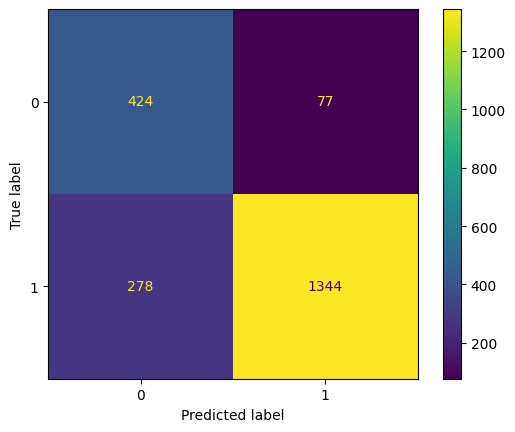

In [ ]:
## convert one hot encoding to class label
predictions = np.argmax(preds,axis=1)
y_test_labels=[1 if label[1]==1 else 0 for label in Y_test]

## display the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

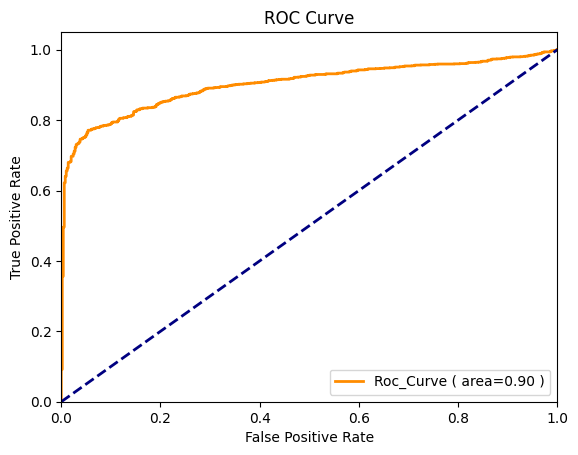

In [ ]:
## Display the RocCurve
from sklearn.metrics import roc_curve, auc

# compute the False positive rate (fpr), True positive Rate (tpr) and the thresholds
fpr,tpr,thresholds=roc_curve(Y_test[:,1],preds[:,1])

#calculate the area under the Roc curve
Roc_auc=auc(fpr,tpr)

# plot the Roc curve
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label='Roc_Curve ( area=%0.2f )'%Roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Build and train a Transfer Learning model



In [5]:
# import dependencies
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [6]:
index2=np.random.randint(0,4000,3000)
index3=index=np.random.randint(0,1000,600)
# prepare the train data:
# copy of the original spectogram along the fourth axis
X_train2=np.concatenate((X_train,X_train,X_train),axis=-1)[index2]
y_train2=y_train[index2]
X_val2=np.concatenate((X_val,X_val,X_val),axis=-1)[index3]
y_val2=y_val[index3]

In [22]:
print(X_train2.shape)

(3000, 128, 258, 3)


In [7]:
unique, counts = np.unique(np.argmax(y_train2, axis=1), return_counts=True)
train_distribution = dict(zip(unique, counts))
train_distribution

{0: 1447, 1: 1553}

In [8]:
# set the base model
input_shape= (128, 258, 3)
base_model = ResNet50V2(weights="imagenet",
            input_shape=input_shape,
            include_top=False)

# Freeze the base_model
base_model.trainable = False

### create a model on top of the base_model.



In [15]:
del model_2

In [16]:
seed=123
inputs = Input(shape=input_shape)

# base_model is running in inference mode here.
x = base_model(inputs, training=False)

x=Dense(20,activation='relu')(x)

x = Flatten()(x)
outputs = Dense(2, activation='softmax')(x)
model_2 = Model(inputs, outputs)
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

filepath="{}_FineTuned.hdf5".format(seed)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [9]:
# class weigth

weight_for_0 = (1 /1447) * (3000/ 2.0)
weight_for_1 = (1 / 1553) * (3000/ 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.04
Weight for class 1: 0.97


In [17]:
## fit the model to the data
history_2 = model_2.fit(X_train2,y_train2,
                    validation_data=(X_val2, y_val2),
                    epochs=4,
                    callbacks=callbacks_list,
                    class_weight=class_weight)



Epoch 1/4
94/94 [==============================] - ETA: 0s - loss: 0.4304 - accuracy: 0.7990
Epoch 1: val_loss improved from inf to 0.29534, saving model to 123_FineTuned.hdf5
94/94 [==============================] - 376s 4s/step - loss: 0.4304 - accuracy: 0.7990 - val_loss: 0.2953 - val_accuracy: 0.8817
Epoch 2/4
94/94 [==============================] - ETA: 0s - loss: 0.2258 - accuracy: 0.9103
Epoch 2: val_loss improved from 0.29534 to 0.24197, saving model to 123_FineTuned.hdf5
94/94 [==============================] - 345s 4s/step - loss: 0.2258 - accuracy: 0.9103 - val_loss: 0.2420 - val_accuracy: 0.9133
Epoch 3/4
94/94 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.9313
Epoch 3: val_loss improved from 0.24197 to 0.21613, saving model to 123_FineTuned.hdf5
94/94 [==============================] - 371s 4s/step - loss: 0.1744 - accuracy: 0.9313 - val_loss: 0.2161 - val_accuracy: 0.9250
Epoch 4/4
94/94 [==============================] - ETA: 0s - loss: 0.1451 

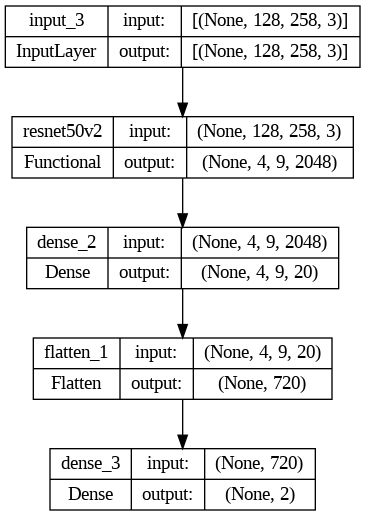

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file='model_arch.png',show_shapes=True)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 258, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 4, 9, 2048)        23564800  
                                                                 
 dense_2 (Dense)             (None, 4, 9, 20)          40980     
                                                                 
 flatten_1 (Flatten)         (None, 720)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1442      
                                                                 
Total params: 23607222 (90.05 MB)
Trainable params: 42422 (165.71 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
# from tensorflow.keras.models import save_model
# model_2=load_model('TL_model.h5')

In [ ]:
# prepare the test data
X_test_S2=np.concatenate((X_test_S,X_test_S,X_test_S),axis=-1)

67/67 [==============================] - 310s 5s/step


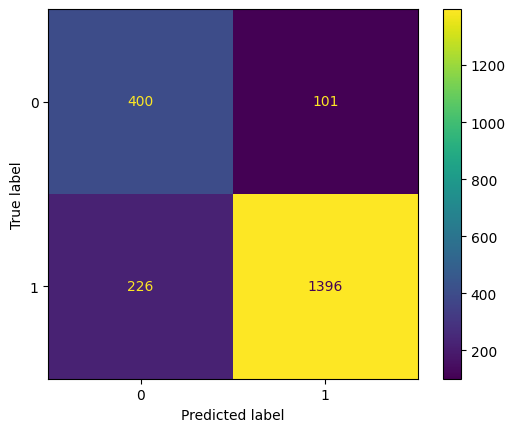

In [ ]:
## make predictions (proba)
preds = model_2.predict(X_test_S2)

## convert one_hot encoding to class label
predictions = np.argmax(preds,axis=1)
y_test_labels=[1 if label[1]==1 else 0 for label in Y_test]

## display the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

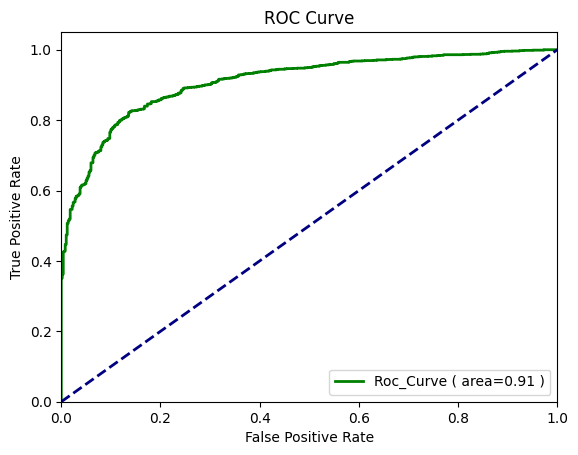

In [ ]:
## Display the RocCurve
from sklearn.metrics import roc_curve, auc

# compute the False positive rate (fpr), True positive Rate (tpr) and the thresholds
fpr,tpr,thresholds=roc_curve(Y_test[:,1],preds[:,1])

#calculate the area under the Roc curve
Roc_auc=auc(fpr,tpr)

# plot the Roc curve
plt.figure()
plt.plot(fpr,tpr,color='green',lw=2,label='Roc_Curve ( area=%0.2f )'%Roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model evaluation on test file : Visualize predictions on Sonic visualizer as bounding boxes.

### process description
For each "test audio file" perform the following steps:


1.  predict on the entire file in a sliding window manner assuming a 3s second input window  using "predict_on_entire_file()" function
2.  store the predictions in a dataframe and get the index position where there was a bird presence detected
3. group consecutive detection  together using "group_consecutives()" function
4. generates an ".svl " file which can be input into Sonic Visualizer we can visually see the predictions as bounding boxes. Using the functions "dataframe_to_svl()"
5. visually inspect the prediction into Sonic visualizer to assess the performance of the model over the audio file.





### Functions and libraries required  for the task

In [14]:
from scipy import signal

def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    # Source: https://github.com/guillaume-chevalier/filtering-stft-and-laplace-transform
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def downsample_file( amplitudes, original_sr, new_sample_rate):
    return librosa.resample(y=amplitudes,
                            orig_sr=original_sr,
                            target_sr=new_sample_rate,
                            res_type='kaiser_fast'), new_sample_rate

 ####################################################################################################################################

import math
def predict_on_entire_file(audio, sample_rate, lowpass_cutoff,
                           downsample_rate, nyquist_rate):

    # Apply a low pass fitler to get rid of high frequency components
    filtered = butter_lowpass_filter(audio, lowpass_cutoff, nyquist_rate)

    # Downsample the audio
    amplitudes, sample_rate = downsample_file(filtered, sample_rate, downsample_rate)

    # Duration of file
    file_duration = len(amplitudes)/sample_rate

    # Number of segments
    segments = math.floor(file_duration) - 3# (-2 because our input is 2 seconds)

    # Store predictions in this list
    predictions = []

    # Loop over the file and work in small "segments"
    for position in range (0, segments):

        # Determine start of segment
        start_position = position

        # Determine end of segment
        # TO DO: make sure you enter the correct duration here based on the above
        end_position = start_position + 3

        print('start position:', start_position)
        print('end position:', end_position)

        # Extract a 3 second segment from the audio file
        audio_segment = amplitudes[start_position*downsample_rate:end_position*downsample_rate]

        print(len(audio_segment))

        # Create the spectrogram
        S = audio_to_spectrogram(audio_segment)

        print(S.shape)

        # Input spectrogram into model
        # TO DO: make sure you enter the correct shape here
        softmax = model.predict(np.reshape(S, (1,128,258,1)))

        print ('model output:', softmax)

        # Binary output
        binary_prediction = np.argmax(softmax,-1)

        print ('binary output:', binary_prediction[0])

        # Append result
        predictions.append('no bird' if np.argmax(softmax,-1)[0]== 0 else 'bird')

        print()

    return predictions

######################################################################################################################################
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

#######################################################################################################################################

!pip install yattag
from itertools import count
from xml.dom import minidom
from yattag import Doc, indent

#######################################################################################################################################

def dataframe_to_svl(dataframe, sample_rate, length_audio_file_frames):

    doc, tag, text = Doc().tagtext()

    # These parts are standard everytime
    doc.asis('<?xml version="1.0" encoding="UTF-8"?>')
    doc.asis('<!DOCTYPE sonic-visualiser>')

    with tag('sv'):
        with tag('data'):

            # This top part is pretty much standard, but we need to specify
            # the sampling rate and length of audio file
            model_string = '<model id="1" name="" sampleRate="{}" start="0" end="{}" type="sparse" dimensions="2" resolution="1" notifyOnAdd="true" dataset="0" subtype="box" minimum="0" maximum="{}" units="Hz" />'.format(sample_rate,
                                                                        length_audio_file_frames,
                                                                        sample_rate/2)
            doc.asis(model_string)

            # This is where we create each annotation
            with tag('dataset', id='0', dimensions='2'):

                # Read dataframe or other data structure and add the values here
                # The start and duration are measured using the sampling rate
                # and not seconds.
                # These are added as "point" elements, for example:
                # '<point frame="15360" value="3136.87" duration="1724416" extent="2139.22" label="Cape Robin" />'
                # frame: start time
                # value: low frequency
                # duration: start + duration
                # extend: high frequency
                for index, row in dataframe.iterrows():

                    point  = '<point frame="{}" value="{}" duration="{}" extent="{}" label="{}" />'.format(
                        int(int(row['start(sec)'])*sample_rate),
                        int(row['low(freq)']),
                        int((int(row['end(sec)'])- int(row['start(sec)']))*sample_rate),
                        int(row['high(freq)']),
                        row['label'])

                    # add the point
                    doc.asis(point)
        with tag('display'):

            display_string = '<layer id="2" type="boxes" name="Boxes" model="1"  verticalScale="0"  colourName="White" colour="#ffffff" darkBackground="true" />'
            doc.asis(display_string)

    result = indent(
        doc.getvalue(),
        indentation = ' '*2,
        newline = '\r\n'
    )

    return result





  Preparing metadata (setup.py) ... done
  Created wheel for yattag: filename=yattag-1.15.2-py3-none-any.whl size=15668 sha256=b21d6904175b9f5296dcc05fa0408df89052fbac80f43e2d09725d25c7f54b55
  Stored in directory: /root/.cache/pip/wheels/3f/6e/e5/d526243c27041915f63eacc0804babeb86b6973b0bc1991f06
Successfully built yattag


### Choose the model : model= '2D CNN'  or  model='Transfer Learning model'
 Specify the path to the test file

### Test process for a given testing file.

Apply the model to the  testing file, `14_2-2-2024=19_41_19..wav`. (choose a testing file)

Specify the path to the test file

In [17]:
path='/content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology/Data/Audio/14_2-2-2024=19_41_19.wav'

In [18]:
# file path

testfile_1, sr_1 = librosa.load(path,sr=22000)
# predictions
predictions = predict_on_entire_file(testfile_1, sr_1, lowpass_cutoff,
                           downsample_rate, nyquist_rate)

### index positions where there bird calls detected

import pandas as pd
df_predictions = pd.DataFrame(predictions, columns=['BinaryPrediction'])
prediction_indices = df_predictions[df_predictions['BinaryPrediction'] == 'bird'].index.values

### goup consecutive detections

groups=group_consecutives(prediction_indices)

### create dataframe we will used to generate the ".svl" file.

start_time = []
end_time = []
low_freq = 2500
high_freq = 7000
for group in groups:
    start_time.append(group[0])
    end_time.append(group[-1]+3)

df_preds = pd.DataFrame({'start(sec)':start_time,
              'end(sec)':end_time,
              'low(freq)':low_freq,
              'high(freq)':high_freq,
              'label':'predicted'})

print(df_preds)

### generate and save the .svl file ( visual predictions as a bounding box)

xml = dataframe_to_svl(df_preds, 22000, len(testfile_1))
text_file = open("test.svl", "w")
n = text_file.write(xml)
text_file.close()


start position: 0
end position: 3
66000
(128, 258)
1/1 [==============================] - 0s 39ms/step
model output: [[0.53449756 0.46550244]]
binary output: 0

start position: 1
end position: 4
66000
(128, 258)
1/1 [==============================] - 0s 34ms/step
model output: [[0.747075   0.25292498]]
binary output: 0

start position: 2
end position: 5
66000
(128, 258)
1/1 [==============================] - 0s 34ms/step
model output: [[0.6980011 0.3019989]]
binary output: 0

start position: 3
end position: 6
66000
(128, 258)
1/1 [==============================] - 0s 33ms/step
model output: [[0.7631645  0.23683548]]
binary output: 0

start position: 4
end position: 7
66000
(128, 258)
1/1 [==============================] - 0s 34ms/step
model output: [[0.7757602  0.22423989]]
binary output: 0

start position: 5
end position: 8
66000
(128, 258)
1/1 [==============================] - 0s 35ms/step
model output: [[0.66855586 0.3314441 ]]
binary output: 0

start position: 6
end position: 9
66